# Fourier Power Spectrum Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
#from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap

In [3]:
simulated_Earth_Folder = "C:/Users/cenwe/Downloads/Programming/Python/simulated_Earth/"
data0125 = xr.open_dataset(simulated_Earth_Folder + "jan0125.nc")
data025 = xr.open_dataset(simulated_Earth_Folder + "jan025.nc")
data05 = xr.open_dataset(simulated_Earth_Folder + "jan05.nc")
data1 = xr.open_dataset(simulated_Earth_Folder + "jan.nc")
data2 = xr.open_dataset(simulated_Earth_Folder + "jan2.nc")

In [5]:
FUS0125 = data0125.FUS
FUS025 = data025.FUS
FUS05 = data05.FUS
FUS1 = data1.FUS
FUS2 = data2.FUS

In [6]:
def greater_than_zero(num):
	return num > 0

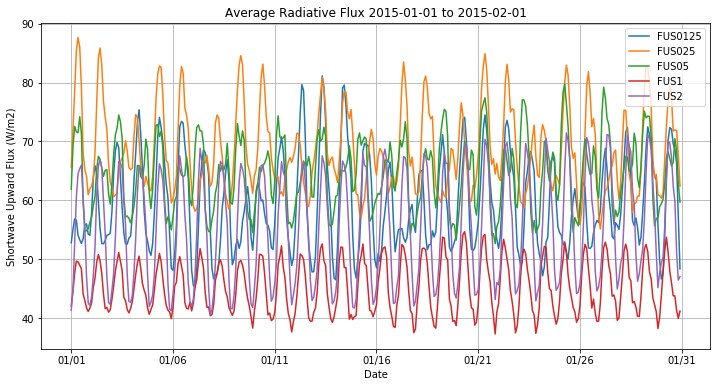

In [7]:
FUS0125Array = []
FUS025Array = []
FUS05Array = []
FUS1Array = []
FUS2Array = []
dpCount = 360

for t in range(dpCount):
    FUS0125Array.append(FUS0125.isel(time = t).mean())
    FUS025Array.append(FUS025.isel(time = t).mean())
    FUS05Array.append(FUS05.isel(time = t).mean())
    FUS1Array.append(FUS1.isel(time = t).mean())
    FUS2Array.append(FUS2.isel(time = t).mean())

plt.figure(figsize=(12,6))
plt.plot(FUS0125Array, label = 'FUS0125')
plt.plot(FUS025Array, label = 'FUS025')
plt.plot(FUS05Array, label = 'FUS05')
plt.plot(FUS1Array, label = 'FUS1')
plt.plot(FUS2Array, label = 'FUS2')
plt.title('Average Radiative Flux 2015-01-01 to 2015-02-01')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(np.arange(0, 384, 60), ['01/01', '01/06', '01/11', '01/16', '01/21', '01/26', '01/31'])
plt.legend()

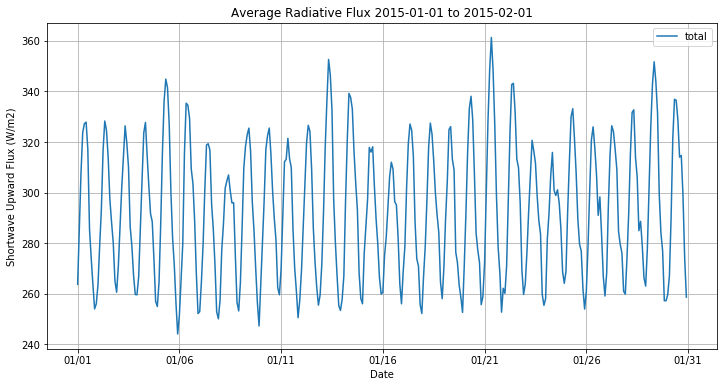

In [8]:
TotalArray = []

for(item1, item2, item3, item4, item5) in zip(FUS0125Array, FUS025Array, FUS05Array, FUS1Array, FUS2Array):
    TotalArray.append((item1 + item2 + item3 + item4 + item5))
    
plt.figure(figsize=(12,6))
plt.plot(TotalArray, label = 'total')
plt.title('Average Radiative Flux 2015-01-01 to 2015-02-01')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(np.arange(0, 384, 60), ['01/01', '01/06', '01/11', '01/16', '01/21', '01/26', '01/31'])
plt.legend()

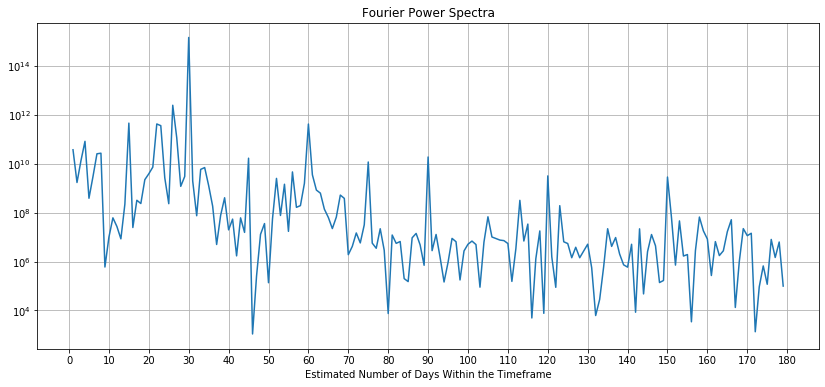

In [9]:
fftInput = np.array(TotalArray) #selected rotational velocity
fourierTransform = np.fft.fft(fftInput)
fourierTransform = fourierTransform[0:int(len(fftInput)/2)]
powerSpectrum = fourierTransform**4

frequency = np.arange(0, len(fftInput)/2)

exclude = 1
plt.figure(figsize=(14,6))
plt.plot(frequency[exclude:], abs(powerSpectrum)[exclude:])

plt.grid(True)
plt.title('Fourier Power Spectra')
plt.xlabel('Estimated Number of Days Within the Timeframe')
plt.xticks(np.arange(0, 181, 10))
plt.yscale('log')